In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [0]:
import tensorflow as tf

In [3]:
tf.__version__

'1.15.2'

# 【問題1】各種手法の実行
Kerasには4種類のReccurentレイヤーが用意されています。SimpleRNN以外はゲート付きリカレントニューラルネットワークです。

### SimpleRNN

In [0]:
# 全体に使う

max_features = 2000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)


In [0]:
import numpy as np
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import InputLayer
from keras.layers.core import Dense, Activation
from keras.layers.recurrent import SimpleRNN
from keras.callbacks import EarlyStopping
from keras.callbacks import CSVLogger
from sklearn import model_selection

In [12]:

model = Sequential()
model.add(Embedding(max_features, 128))
model.add(
    SimpleRNN(units=hidden_dims, return_sequences=False))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=10,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 36s 1ms/step - loss: 0.5360 - acc: 0.7190 - val_loss: 0.4934 - val_acc: 0.7520
Epoch 2/10
25000/25000 [==============================] - 37s 1ms/step - loss: 0.4057 - acc: 0.8227 - val_loss: 0.4301 - val_acc: 0.8137
Epoch 3/10
25000/25000 [==============================] - 36s 1ms/step - loss: 0.3674 - acc: 0.8438 - val_loss: 0.4383 - val_acc: 0.8096
Epoch 4/10
25000/25000 [==============================] - 36s 1ms/step - loss: 0.3485 - acc: 0.8516 - val_loss: 0.4531 - val_acc: 0.8016
Epoch 5/10
25000/25000 [==============================] - 36s 1ms/step - loss: 0.2911 - acc: 0.8826 - val_loss: 0.4679 - val_acc: 0.7915
Epoch 6/10
25000/25000 [==============================] - 36s 1ms/step - loss: 0.2442 - acc: 0.9046 - val_loss: 0.5153 - val_acc: 0.7894
Epoch 7/10
25000/25000 [==============================] - 36s 1ms/step - loss: 0.2088 - acc: 0.9217 - val_loss: 0.5704 

### GRU

In [13]:
from keras.layers import GRU

model = Sequential()
model.add(Embedding(max_features, 128))
model.add(
    GRU(units=hidden_dims, return_sequences=False))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=10,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 111s 4ms/step - loss: 0.4628 - acc: 0.7727 - val_loss: 0.3959 - val_acc: 0.8216
Epoch 2/10
25000/25000 [==============================] - 110s 4ms/step - loss: 0.3514 - acc: 0.8468 - val_loss: 0.3621 - val_acc: 0.8378
Epoch 3/10
25000/25000 [==============================] - 108s 4ms/step - loss: 0.3050 - acc: 0.8680 - val_loss: 0.3519 - val_acc: 0.8414
Epoch 4/10
25000/25000 [==============================] - 103s 4ms/step - loss: 0.2677 - acc: 0.8880 - val_loss: 0.3832 - val_acc: 0.8391
Epoch 5/10
25000/25000 [==============================] - 102s 4ms/step - loss: 0.2368 - acc: 0.9035 - val_loss: 0.3732 - val_acc: 0.8408
Epoch 6/10
25000/25000 [==============================] - 102s 4ms/step - loss: 0.2100 - acc: 0.9167 - val_loss: 0.4239 - val_acc: 0.8395
Epoch 7/10
25000/25000 [==============================] - 102s 4ms/step - loss: 0.1796 - acc: 0.9293 - val_loss: 

### LSTM

In [5]:
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb

Using TensorFlow backend.


In [7]:

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=10,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)
Build model...
Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 152s 6ms/step - loss: 0.4839 - acc: 0.7682 - val_loss: 0.4227 - val_acc: 0.8164
Epoch 2/10
25000/25000 [==============================] - 146s 6ms/step - loss: 0.3940 - acc: 0.8251 - val_loss: 0.3915 - val_acc: 0.8184
Epoch 3/10
25000/25000 [==============================] - 146s 6ms/step - loss: 0.3525 - acc: 0.8461 - val_loss: 0.3763 - val_acc: 0.8346
Epoch 4/10
25000/25000 [==============================] - 148s 6ms/step - loss: 0.3237 - acc: 0.8605 - val_loss: 0.3781 - val_acc: 0.8353
Epoch 5/10
25000/25000 [==============================] - 151s 6ms/step - loss: 0.2974 - acc: 0.8732 - val_loss: 0.3759 - val_acc: 0.8329
Epoch 6/10
25000/25000 [==============================] - 148s 6ms/step - loss: 0.2787 - acc:

### ConvLSTM2D

In [14]:
from keras.layers.convolutional_recurrent import ConvLSTM2D
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv3D

seq = Sequential()
seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   input_shape=(None, 40, 40, 1),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(Conv3D(filters=1, kernel_size=(3, 3, 3),
               activation='sigmoid',
               padding='same', data_format='channels_last'))

seq.compile(loss='binary_crossentropy', optimizer='adadelta', metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=3,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 109s 4ms/step - loss: 0.0973 - acc: 0.9650 - val_loss: 0.6580 - val_acc: 0.8205
Epoch 2/3
25000/25000 [==============================] - 103s 4ms/step - loss: 0.0806 - acc: 0.9726 - val_loss: 0.6627 - val_acc: 0.8191
Epoch 3/3
25000/25000 [==============================] - 16s 635us/step
Test score: 0.732147893987298
Test accuracy: 0.82272


Train on 950 samples, validate on 50 samples
Epoch 1/10
950/950 [==============================] - 31s 33ms/step - loss: 0.0390 - acc: 0.9909 - val_loss: 0.3810 - val_acc: 0.8214
Epoch 2/10
950/950 [==============================] - 32s 33ms/step - loss: 0.0013 - acc: 0.9997 - val_loss: 0.0076 - val_acc: 0.9997
Epoch 3/10
950/950 [==============================] - 32s 33ms/step - loss: 6.0889e-04 - acc: 0.9998 - val_loss: 7.2707e-04 - val_acc: 0.9999
Epoch 4/10
950/950 [==============================] - 31s 33ms/step - loss: 4.3151e-04 - acc: 0.9999 - val_loss: 3.3162e-04 - val_acc: 0.9999
Epoch 5/10
950/950 [==============================] - 31s 33ms/step - loss: 3.5486e-04 - acc: 0.9999 - val_loss: 2.5872e-04 - val_acc: 1.0000
Epoch 6/10
950/950 [==============================] - 31s 33ms/step - loss: 3.0684e-04 - acc: 0.9999 - val_loss: 2.1507e-04 - val_acc: 1.0000
Epoch 7/10
950/950 [==============================] - 31s 33ms/step - loss: 2.7251e-04 - acc: 0.9999 - val_loss: 1.9334

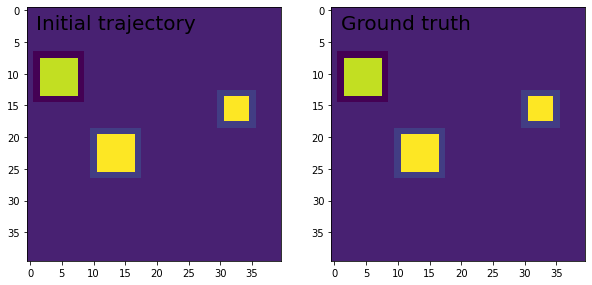

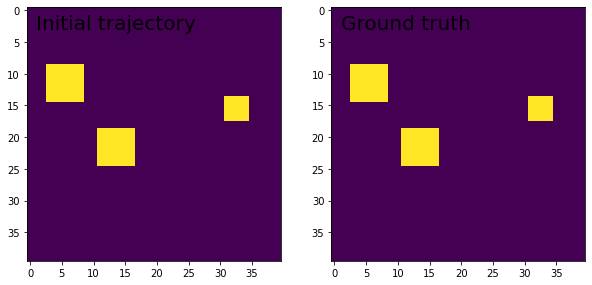

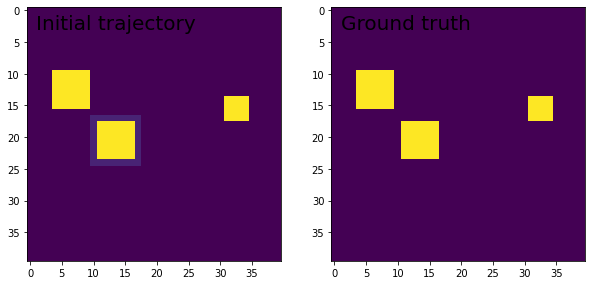

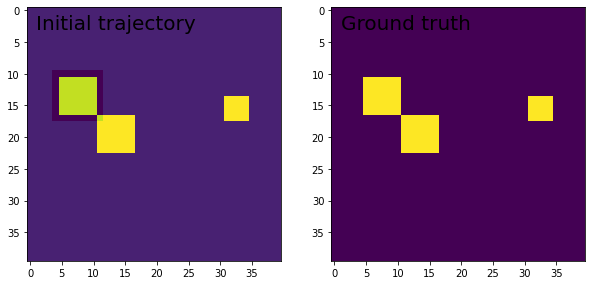

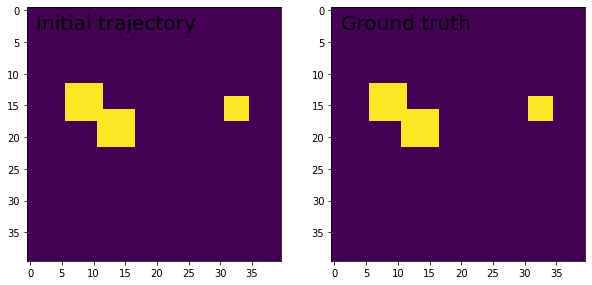

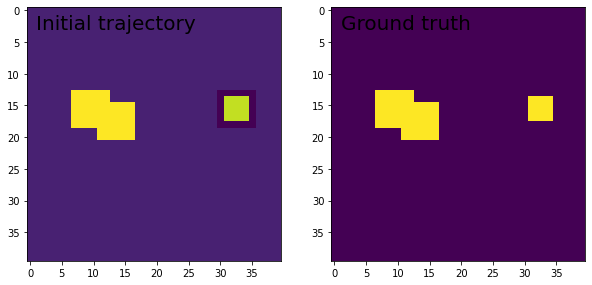

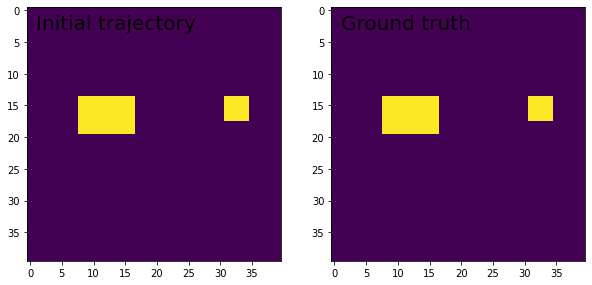

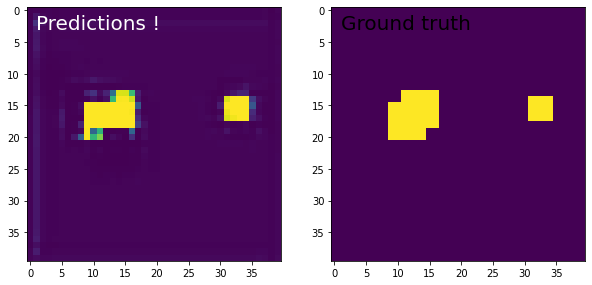

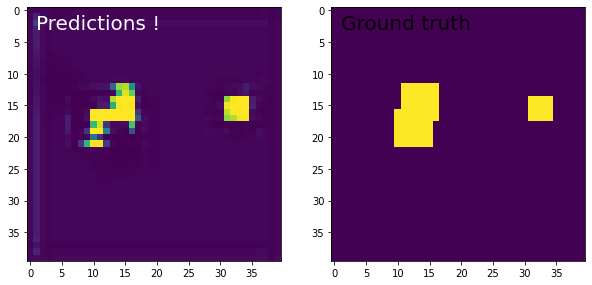

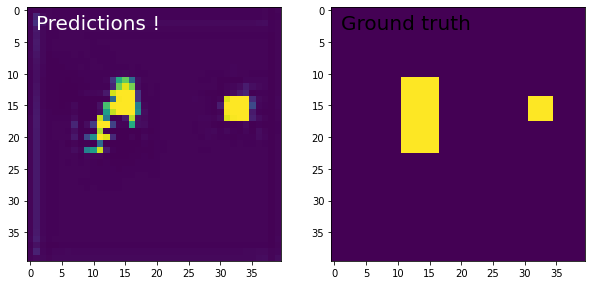

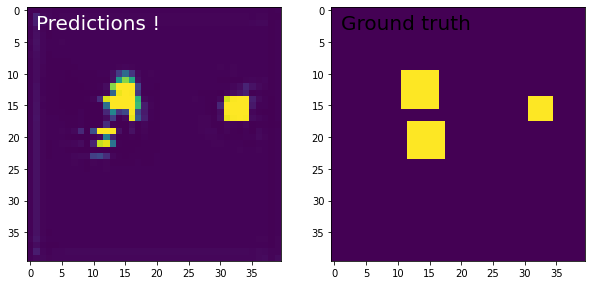

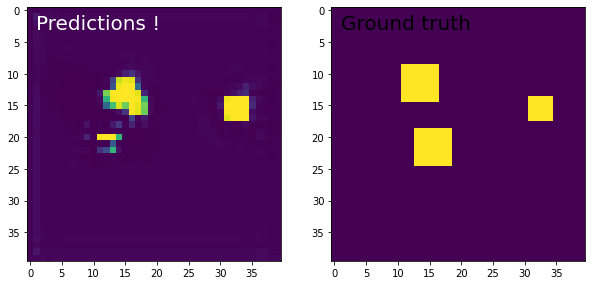

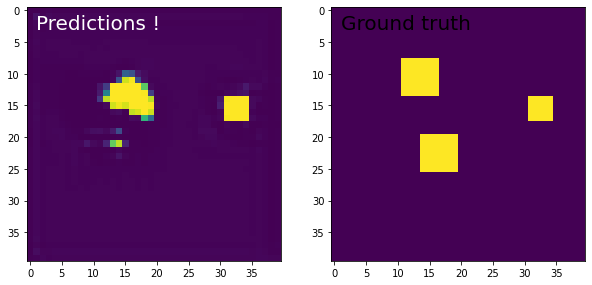

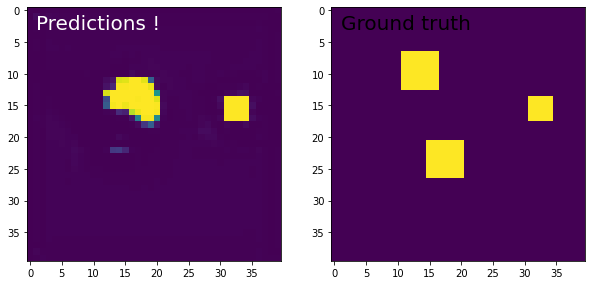

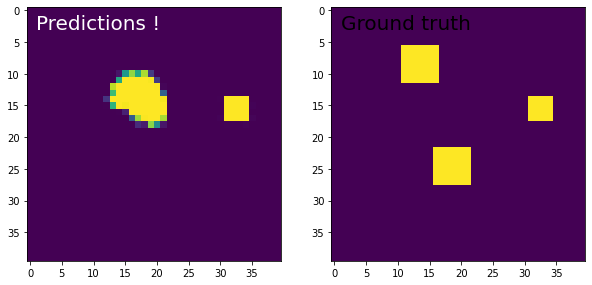

In [19]:
import matplotlib.pyplot as plt

def generate_movies(n_samples=1200, n_frames=15):
    row = 80
    col = 80
    noisy_movies = np.zeros((n_samples, n_frames, row, col, 1), dtype=np.float)
    shifted_movies = np.zeros((n_samples, n_frames, row, col, 1),
                              dtype=np.float)

    for i in range(n_samples):
        # Add 3 to 7 moving squares
        n = np.random.randint(3, 8)

        for j in range(n):
            # Initial position
            xstart = np.random.randint(20, 60)
            ystart = np.random.randint(20, 60)
            # Direction of motion
            directionx = np.random.randint(0, 3) - 1
            directiony = np.random.randint(0, 3) - 1

            # Size of the square
            w = np.random.randint(2, 4)

            for t in range(n_frames):
                x_shift = xstart + directionx * t
                y_shift = ystart + directiony * t
                noisy_movies[i, t, x_shift - w: x_shift + w,
                             y_shift - w: y_shift + w, 0] += 1

                # Make it more robust by adding noise.
                # The idea is that if during inference,
                # the value of the pixel is not exactly one,
                # we need to train the network to be robust and still
                # consider it as a pixel belonging to a square.
                if np.random.randint(0, 2):
                    noise_f = (-1)**np.random.randint(0, 2)
                    noisy_movies[i, t,
                                 x_shift - w - 1: x_shift + w + 1,
                                 y_shift - w - 1: y_shift + w + 1,
                                 0] += noise_f * 0.1

                # Shift the ground truth by 1
                x_shift = xstart + directionx * (t + 1)
                y_shift = ystart + directiony * (t + 1)
                shifted_movies[i, t, x_shift - w: x_shift + w,
                               y_shift - w: y_shift + w, 0] += 1

    # Cut to a 40x40 window
    noisy_movies = noisy_movies[::, ::, 20:60, 20:60, ::]
    shifted_movies = shifted_movies[::, ::, 20:60, 20:60, ::]
    noisy_movies[noisy_movies >= 1] = 1
    shifted_movies[shifted_movies >= 1] = 1
    return noisy_movies, shifted_movies

# Train the network
noisy_movies, shifted_movies = generate_movies(n_samples=1200)
seq.fit(noisy_movies[:1000], shifted_movies[:1000], batch_size=10,
        epochs=10, validation_split=0.05)

# Testing the network on one movie
# feed it with the first 7 positions and then
# predict the new positions
which = 1004
track = noisy_movies[which][:7, ::, ::, ::]

for j in range(16):
    new_pos = seq.predict(track[np.newaxis, ::, ::, ::, ::])
    new = new_pos[::, -1, ::, ::, ::]
    track = np.concatenate((track, new), axis=0)


# And then compare the predictions
# to the ground truth
track2 = noisy_movies[which][::, ::, ::, ::]
for i in range(15):
    fig = plt.figure(figsize=(10, 5))

    ax = fig.add_subplot(121)

    if i >= 7:
        ax.text(1, 3, 'Predictions !', fontsize=20, color='w')
    else:
        ax.text(1, 3, 'Initial trajectory', fontsize=20)

    toplot = track[i, ::, ::, 0]

    plt.imshow(toplot)
    ax = fig.add_subplot(122)
    plt.text(1, 3, 'Ground truth', fontsize=20)

    toplot = track2[i, ::, ::, 0]
    if i >= 2:
        toplot = shifted_movies[which][i - 1, ::, ::, 0]

    plt.imshow(toplot)
    plt.savefig('%i_animate.png' % (i + 1))

# 【問題2】（アドバンス課題）複数のデータセット間での比較
他のデータセットでも実験を行なってください。



In [0]:
# データセットの準備

# 【問題3】他のクラスの説明
ドキュメントには他にも関連するクラスが記載されています。それらがどういうものなのかを説明してください。この中には実際に扱うことは少ないクラスも含まれています。

### RNN

一般的なリカレントニューラルのこと

### SimpleRNNCell

シンプルなRCNNのセル

### GRUCell

GRUレイヤーのためのCellクラス
implementationで実装モードを選ぶことができる。
モード1は小さなドット積や加算処理を多数行う構造。
モード2は少数の大きな操作をバッチ処理する

### LSTMCell

他のクラスとは違い、unit_forget_biasで真理値．Trueなら，初期化時に忘却ゲートのバイアスに1を加えルことができるなど、忘却バイアスの設定が必要

### StackedRNNCells

RNN cellのスタックの振る舞いを単一のcellのようにするためのラッパー．

効率的なstacked RNNを実装するために使われます．

### CuDNNGRU

CuDNNを利用した高速なGRU実装．

TensorFlowバックエンドでGPU上でのみ動作します．

### CuDNNLSTM

CuDNNを利用した高速なLSTM実装．

TensorFlowバックエンドでGPU上でのみ動作します．